In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pylab as pl
import scipy.optimize as opt
%matplotlib inline

In [30]:
df = pd.read_csv('ChurnData.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [31]:
cdf = df[['tenure', 'MonthlyCharges', 'Churn']]
cdf['Churn'] = df['Churn'].astype('int')
cdf.head()

C:\Users\chitr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tenure,MonthlyCharges,Churn
0,1,29.85,0
1,34,56.95,0
2,2,53.85,1
3,45,42.30,0
4,2,70.70,1


In [32]:
cdf.shape

(7043, 3)

In [82]:
X = np.asarray(cdf[['tenure', 'MonthlyCharges']])
X[0:5]

array([[ 1.  , 29.85],
       [34.  , 56.95],
       [ 2.  , 53.85],
       [45.  , 42.3 ],
       [ 2.  , 70.7 ]])

In [83]:
y = np.asarray(cdf[['Churn']])
y[0:5]

array([[0],
       [0],
       [1],
       [0],
       [1]])

In [84]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.28, -1.16],
       [ 0.07, -0.26],
       [-1.24, -0.36],
       [ 0.51, -0.75],
       [-1.24,  0.2 ]])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (5634, 2) (5634, 1)
Test set:  (1409, 2) (1409, 1)


In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.1, solver = 'liblinear').fit(X_train, y_train)
LR

C:\Users\chitr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
y_hat_prob = LR.predict_proba(X_test)
y_hat_prob

array([[0.69, 0.31],
       [0.93, 0.07],
       [0.86, 0.14],
       ...,
       [0.94, 0.06],
       [0.96, 0.04],
       [0.87, 0.13]])

In [89]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat)

0.3201663201663202

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_hat, labels=[1,0]))

[[154 220]
 [107 928]]


Confusion matrix, without normalization
[[154 220]
 [107 928]]


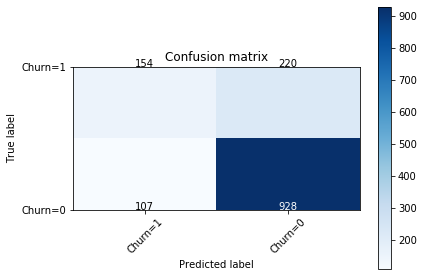

In [91]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Churn=1','Churn=0'],normalize= False,  title='Confusion matrix')